# Gradient descent

## 1. Linear regression with one variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
np.set_printoptions(precision=3)

### 1.1 Plotting the Data

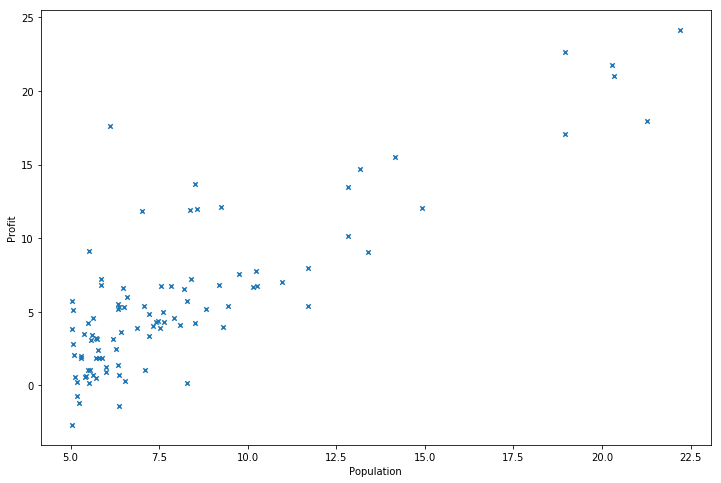

In [2]:
data1 = pd.read_csv("ex1data1.txt", header=None, names=['Population', 'Profit'])
data1.plot(kind="scatter", x='Population', y='Profit', marker='x', figsize=(12, 8))

### 1.2 Gradient Descent

#### 1.2.1 Update Equations

The objective of linear regression if to minimize the cost function $$J(\theta)=\frac{1}{2m}\sum^m_{i=1}[h_{\theta}(x^{(i)})-y^{(i)}]^2$$where the hypothesis $h_{\theta}(x)$ is given by the linear model $$h_{\theta}(x)=\theta^Tx=\theta_0+\theta_1x_1$$

#### 1.2.2 Initialization

In [3]:
data1.insert(0, 'x0', 1)
data1.head()

,x0,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
col = data1.shape[1]
data1_x = data1.iloc[:, :col-1].values
data1_y = data1.iloc[:, col-1:].values.ravel()
theta1 = np.zeros(data1_x.shape[1])

print(data1_x.shape)
print(data1_y.shape)
print(theta1.shape)

(97, 2)
(97,)
(2,)
(97,)


#### 1.2.3 Computing the cost $J(\theta)$

In [10]:
def cost(theta, x, y):
    return (1 / (2 * len(x))) * np.power(x @ theta - y, 2).sum()

In [11]:
cost(theta1, data1_x, data1_y)

32.072733877455676

#### 1.2.4 Gradient Descent

In batch gradient descent, each iteration performs the update until convergence$$\theta_j=\theta_j-\alpha\frac{1}{m}\sum^m_{i=1}\left[h_{\theta}(x^{(i)})-y^{(i)}\right]x_j^{(i)}$$

In [12]:
def gradient(theta, x, y):
    return (1 / len(x)) * x.T @ (x @ theta - y)

In [22]:
def liner_regression(theta, x, y, alpha, iters):
    costs = []

    for i in range(iters):
        theta = theta - alpha * gradient(theta, x, y)
        this_cost = cost(theta, x, y)
        costs.append(this_cost)
    
        if i % 100 == 0 and i != 0:
            print("Index:{:>5d}, cost:{:>.3f}".format(i, this_cost))
        
    print("------train over------")
    print("Final cost:{:>.3f}".format(cost(theta, x, y)))
    print("theta:", end=" ")
    print(theta)
    
    return theta, costs

In [23]:
theta1, costs1 = liner_regression(theta1, data1_x, data1_y, 0.01, 1500)

Index:  100, cost:4.481
Index:  200, cost:4.480
Index:  300, cost:4.479
Index:  400, cost:4.478
Index:  500, cost:4.478
Index:  600, cost:4.478
Index:  700, cost:4.477
Index:  800, cost:4.477
Index:  900, cost:4.477
Index: 1000, cost:4.477
Index: 1100, cost:4.477
Index: 1200, cost:4.477
Index: 1300, cost:4.477
Index: 1400, cost:4.477
------train over------
Final cost:4.477
theta: [-3.878  1.191]


#### 1.2.5 Visualizing

Text(0.5, 1.0, 'Linear regression with one variable')

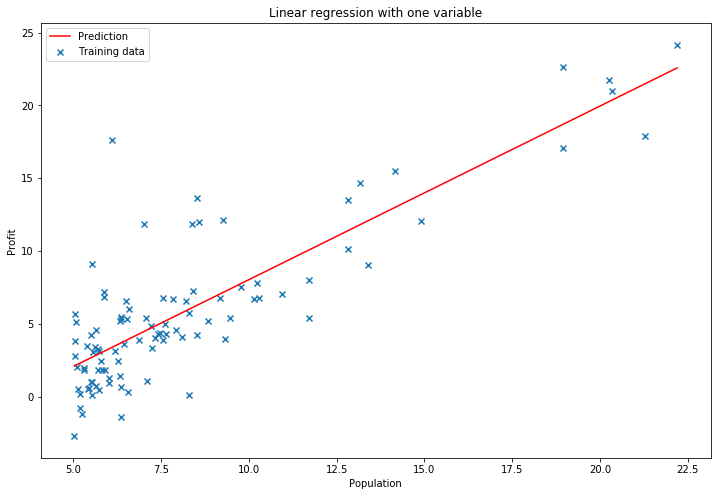

In [24]:
x = np.linspace(data1.Population.min(), data1.Population.max(), 100)
y = np.dot(np.insert(x.reshape(100, 1), 0, values=np.ones(100), axis=1), theta1.T)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, y, 'r', label='Prediction')
ax.scatter(data1.Population, data1.Profit, marker='x', label='Training data')
ax.legend(loc=2)
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title("Linear regression with one variable")

Text(0.5, 1.0, 'Cost change')

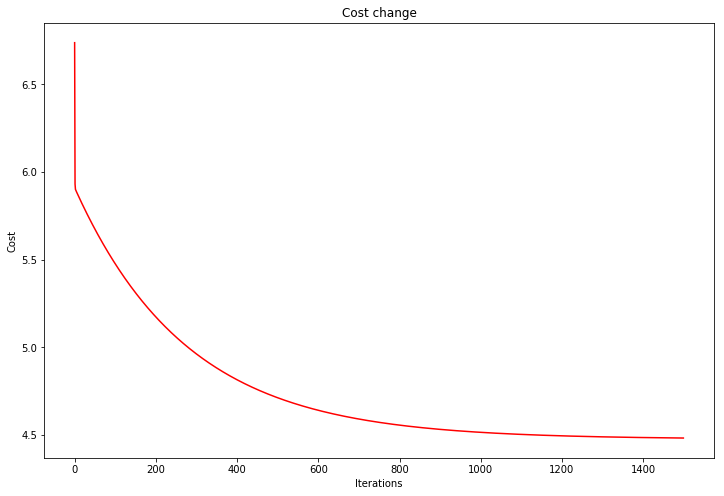

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(costs1, 'r-')
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Cost change")

## 2. Linear regression with multiple variables

### 2.1 Feature Normalization

In [31]:
data2 = pd.read_csv("ex1data2.txt", header=None, names=['Size', 'Bedroom', 'Price'])
data2.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [32]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedroom,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### 2.2 Gradient Descent

#### 2.2.1 Initialization

In [33]:
data2.insert(0, 'x0', 1)

col = data2.shape[1]
data2_x = data2.iloc[:, :col - 1].values
data2_y = data2.iloc[:, col - 1:].values.ravel()
theta2 = np.zeros(data2_x.shape[1])

print(data2_x.shape)
print(data2_y.shape)
print(theta2)

(47, 3)
(47,)
[0. 0. 0.]


In [34]:
cost(theta2, data2_x, data2_y)

0.4893617021276596

#### 2.2.2 Gradient Descent

In [36]:
theta2, costs2 = liner_regression(theta2, data2_x, data2_y, 0.03, 1000)

Index:  100, cost:0.138
Index:  200, cost:0.131
Index:  300, cost:0.131
Index:  400, cost:0.131
Index:  500, cost:0.131
Index:  600, cost:0.131
Index:  700, cost:0.131
Index:  800, cost:0.131
Index:  900, cost:0.131
------train over------
Final cost:0.131
theta: [-1.001e-16  8.848e-01 -5.318e-02]


Text(0.5, 1.0, 'Cost change')

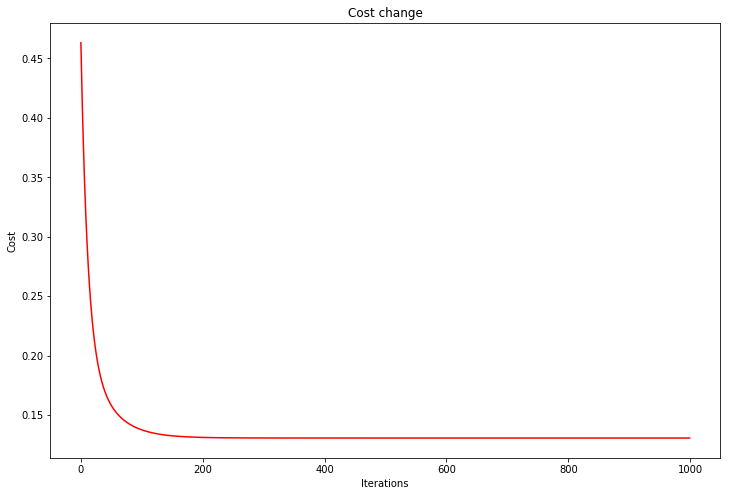

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(len(costs2)), costs2, 'r-')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost change')